In [54]:
# import the dataset
import pandas as pd
import torch
import numpy as np
from torch.autograd import Variable
from tqdm import tqdm_notebook as tqdm
# Creating the dataloader (necessary for PyTorch)
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader # package that helps transform your data to machine learning readiness
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import ast
from sklearn.preprocessing import MultiLabelBinarizer

In [41]:
movies_df = pd.read_csv('data/movies_metadata.csv')

/vol/hpc-software/software/Anaconda3/2020.07/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [55]:
multilabel = MultiLabelBinarizer()

In [53]:
movies_df["genres"] = movies_df["genres"].apply(lambda s:  [ i["name"] for i in ast.literal_eval(s)])
movies_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[Drama, Family]",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,[Drama],NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[Action, Drama, Thriller]",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [56]:
gen = multilabel.fit_transform(movies_df["genres"])
gen

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [57]:
pd.DataFrame(gen,columns=multilabel.classes_)

,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,...,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
45462,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
45463,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
45464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


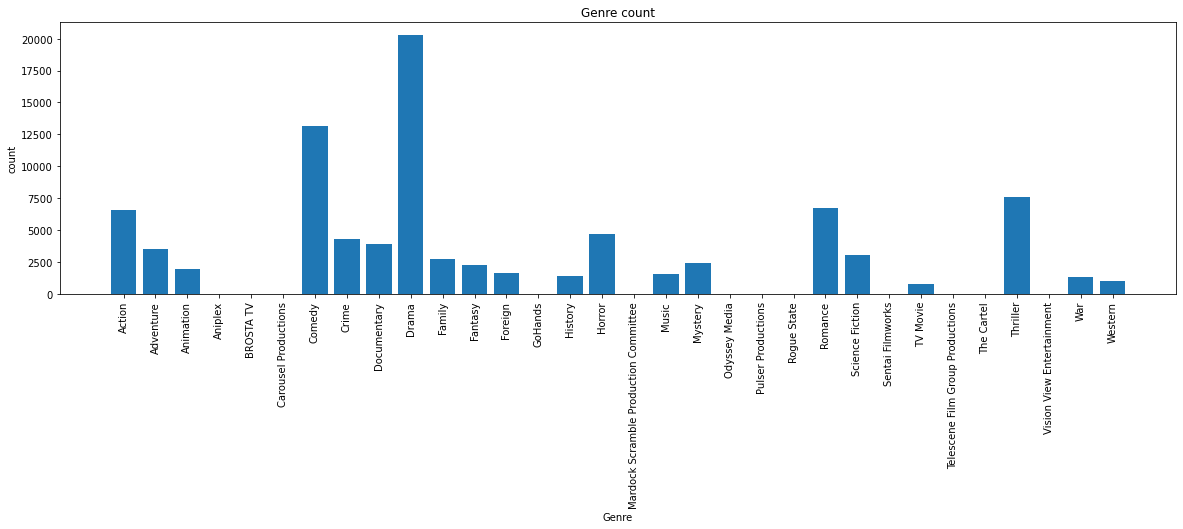

In [62]:
sum_column = gen.sum(axis=0)
plt.figure(figsize=(20,5))
plt.bar(multilabel.classes_,sum_column)
plt.xticks(rotation=90)
plt.title("Genre count")
plt.xlabel("Genre")
plt.ylabel("count")
plt.show()

In [63]:
multilabel.classes_

array(['Action', 'Adventure', 'Animation', 'Aniplex', 'BROSTA TV',
       'Carousel Productions', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror',
       'Mardock Scramble Production Committee', 'Music', 'Mystery',
       'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance',
       'Science Fiction', 'Sentai Filmworks', 'TV Movie',
       'Telescene Film Group Productions', 'The Cartel', 'Thriller',
       'Vision View Entertainment', 'War', 'Western'], dtype=object)

In [40]:
movies_df = movies_df[["id","original_title"]]
movies_df.columns = ["movieId","title"]
movies_df

,movieId,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II
...,...,...
45461,439050,رگ خواب
45462,111109,Siglo ng Pagluluwal
45463,67758,Betrayal
45464,227506,Satana likuyushchiy


In [3]:
ratings_df = pd.read_csv('./data/ratings_small.csv')
ratings_df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [4]:
print('The dimensions of movies dataframe are:', movies_df.shape,'\nThe dimensions of ratings dataframe are:', ratings_df.shape)

The dimensions of movies dataframe are: (45466, 2) 
The dimensions of ratings dataframe are: (100004, 4)


In [28]:
movies_df.isnull().sum()

movieId    0
title      0
dtype: int64

In [29]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [31]:
ratings_df.isnull().values.any()


False

In [27]:
print('The dimensions of movies dataframe are:', movies_df.shape,'\nThe dimensions of ratings dataframe are:', ratings_df.shape)

The dimensions of movies dataframe are: (45466, 2) 
The dimensions of ratings dataframe are: (100004, 4)


In [5]:
# Take a look at movies_df
movies_df.head()

,movieId,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [6]:
# movies_df[movies_df["movieId"][862]]

# movies_df.loc[movies_df['movieId'] == 862]

movies_df[['title']][movies_df['movieId']=="862"]

,title
0,Toy Story


In [7]:
# Take a look at ratings_df
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [8]:
# Movie ID to movie name mapping
movie_names = movies_df.set_index('movieId')['title'].to_dict()
n_users = len(ratings_df.userId.unique())
n_items = len(ratings_df.movieId.unique())
print("Number of unique users:", n_users)
print("Number of unique movies:", n_items)
print("The full rating matrix will have:", n_users*n_items, 'elements.')
print('----------')
print("Number of ratings:", len(ratings_df))
print("Therefore: ", len(ratings_df) / (n_users*n_items) * 100, '% of the matrix is filled.')
print("We have an incredibly sparse matrix to work with here.")
print("And... as you can imagine, as the number of users and products grow, the number of elements will increase by n*2")
print("You are going to need a lot of memory to work with global scale... storing a full matrix in memory would be a challenge.")
print("One advantage here is that matrix factorization can realize the rating matrix implicitly, thus we don't need all the data")

Number of unique users: 671
Number of unique movies: 9066
The full rating matrix will have: 6083286 elements.
----------
Number of ratings: 100004
Therefore:  1.6439141608663475 % of the matrix is filled.
We have an incredibly sparse matrix to work with here.
And... as you can imagine, as the number of users and products grow, the number of elements will increase by n*2
You are going to need a lot of memory to work with global scale... storing a full matrix in memory would be a challenge.
One advantage here is that matrix factorization can realize the rating matrix implicitly, thus we don't need all the data


In [9]:
len(movie_names)

45436

In [10]:
class MatrixFactorization(torch.nn.Module):
    def __init__(self, n_users, n_items, n_factors=20):
        super().__init__()
        # create user embeddings
        self.user_factors = torch.nn.Embedding(n_users, n_factors) # think of this as a lookup table for the input.
        # create item embeddings
        self.item_factors = torch.nn.Embedding(n_items, n_factors) # think of this as a lookup table for the input.
        self.user_factors.weight.data.uniform_(0, 0.05)
        self.item_factors.weight.data.uniform_(0, 0.05)
        
    def forward(self, data):
        # matrix multiplication
        users, items = data[:,0], data[:,1]
        return (self.user_factors(users)*self.item_factors(items)).sum(1)
    # def forward(self, user, item):
    # 	# matrix multiplication
    #     return (self.user_factors(user)*self.item_factors(item)).sum(1)
    
    def predict(self, user, item):
        return self.forward(user, item)

In [11]:
# Note: This isn't 'good' practice, in a MLops sense but we'll roll with this since the data is already loaded in memory.
class Loader(Dataset):
    def __init__(self):
        self.ratings = ratings_df.copy()
        
        # Extract all user IDs and movie IDs
        users = ratings_df.userId.unique()
        movies = ratings_df.movieId.unique()
        
        #--- Producing new continuous IDs for users and movies ---
        
        # Unique values : index
        self.userid2idx = {o:i for i,o in enumerate(users)}
        self.movieid2idx = {o:i for i,o in enumerate(movies)}
        
        # Obtained continuous ID for users and movies
        self.idx2userid = {i:o for o,i in self.userid2idx.items()}
        self.idx2movieid = {i:o for o,i in self.movieid2idx.items()}
        
        # return the id from the indexed values as noted in the lambda function down below.
        self.ratings.movieId = ratings_df.movieId.apply(lambda x: self.movieid2idx[x])
        self.ratings.userId = ratings_df.userId.apply(lambda x: self.userid2idx[x])
        
        
        self.x = self.ratings.drop(['rating', 'timestamp'], axis=1).values
        self.y = self.ratings['rating'].values
        self.x, self.y = torch.tensor(self.x), torch.tensor(self.y) # Transforms the data to tensors (ready for torch models.)

    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.ratings)

In [33]:
num_epochs = 128
cuda = torch.cuda.is_available()



model = MatrixFactorization(n_users, n_items, n_factors=8)

print("Is running on GPU:", cuda)
print(model)
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)
# # GPU enable if you have a GPU...
if cuda:
    model = model.cuda()

# MSE loss
loss_fn = torch.nn.MSELoss()

# ADAM optimizier
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train data
train_set = Loader()
train_loader = DataLoader(train_set, 128, shuffle=True)
print(train_loader)

Is running on GPU: False
MatrixFactorization(
  (user_factors): Embedding(671, 8)
  (item_factors): Embedding(9066, 8)
)
user_factors.weight tensor([[0.0189, 0.0112, 0.0344,  ..., 0.0174, 0.0274, 0.0263],
        [0.0390, 0.0308, 0.0175,  ..., 0.0019, 0.0048, 0.0380],
        [0.0080, 0.0078, 0.0005,  ..., 0.0147, 0.0402, 0.0384],
        ...,
        [0.0123, 0.0391, 0.0031,  ..., 0.0199, 0.0156, 0.0426],
        [0.0030, 0.0201, 0.0032,  ..., 0.0351, 0.0219, 0.0024],
        [0.0369, 0.0031, 0.0443,  ..., 0.0257, 0.0343, 0.0327]])
item_factors.weight tensor([[0.0269, 0.0067, 0.0279,  ..., 0.0336, 0.0272, 0.0066],
        [0.0287, 0.0167, 0.0171,  ..., 0.0460, 0.0286, 0.0381],
        [0.0021, 0.0370, 0.0213,  ..., 0.0174, 0.0033, 0.0179],
        ...,
        [0.0238, 0.0082, 0.0395,  ..., 0.0003, 0.0346, 0.0401],
        [0.0394, 0.0047, 0.0409,  ..., 0.0280, 0.0257, 0.0268],
        [0.0327, 0.0004, 0.0203,  ..., 0.0062, 0.0266, 0.0086]])


In [13]:
test_set = Loader()
test_loader = DataLoader(test_set, 128, shuffle=True)
test_loader

In [14]:
for it in tqdm(range(num_epochs)):
    losses = []
    for x, y in train_loader:
         if cuda:
            x, y = x.cuda(), y.cuda()
            optimizer.zero_grad()
            outputs = model(x)
            loss = loss_fn(outputs.squeeze(), y.type(torch.float32))
            losses.append(loss.item())
            loss.backward()
            optimizer.step()
#     print("iter #{}".format(it), "Loss:", sum(losses) / len(losses))

<ipython-input-14-8f252ede9b44>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for it in tqdm(range(num_epochs)):


  0%|          | 0/128 [00:00<?, ?it/s]

In [35]:
losses = []
for x, y in test_loader:
     if cuda:
        x, y = x.cuda(), y.cuda()
        optimizer.zero_grad()
        outputs = model(x)
        loss = loss_fn(outputs.squeeze(), y.type(torch.float32))
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
losses

[]

In [15]:
# By training the model, we will have tuned latent factors for movies and users.
c = 0
uw = 0
iw = 0 
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)
        if c == 0:
          uw = param.data
          c +=1
        else:
          iw = param.data
        #print('param_data', param_data)

user_factors.weight tensor([[0.0158, 0.0156, 0.0445,  ..., 0.0207, 0.0382, 0.0190],
        [0.0189, 0.0016, 0.0127,  ..., 0.0022, 0.0311, 0.0255],
        [0.0287, 0.0327, 0.0038,  ..., 0.0282, 0.0095, 0.0351],
        ...,
        [0.0333, 0.0356, 0.0250,  ..., 0.0212, 0.0129, 0.0154],
        [0.0420, 0.0004, 0.0312,  ..., 0.0292, 0.0158, 0.0038],
        [0.0255, 0.0099, 0.0324,  ..., 0.0489, 0.0048, 0.0343]])
item_factors.weight tensor([[0.0185, 0.0496, 0.0131,  ..., 0.0213, 0.0053, 0.0348],
        [0.0196, 0.0490, 0.0151,  ..., 0.0115, 0.0082, 0.0114],
        [0.0110, 0.0374, 0.0320,  ..., 0.0428, 0.0009, 0.0174],
        ...,
        [0.0415, 0.0485, 0.0075,  ..., 0.0493, 0.0172, 0.0213],
        [0.0347, 0.0409, 0.0393,  ..., 0.0409, 0.0048, 0.0326],
        [0.0080, 0.0246, 0.0362,  ..., 0.0195, 0.0077, 0.0047]])


In [16]:
trained_movie_embeddings = model.item_factors.weight.data.cpu().numpy()

In [17]:
len(trained_movie_embeddings) # unique movie factor weights

9066

In [18]:
len(trained_movie_embeddings)


9066

In [19]:

# Fit the clusters based on the movie weights
# kmeans = KMeans(n_clusters=10, random_state=0).fit_predict(trained_movie_embeddings)
new_y =  KMeans(n_clusters=10, random_state=0).fit_predict(trained_movie_embeddings)

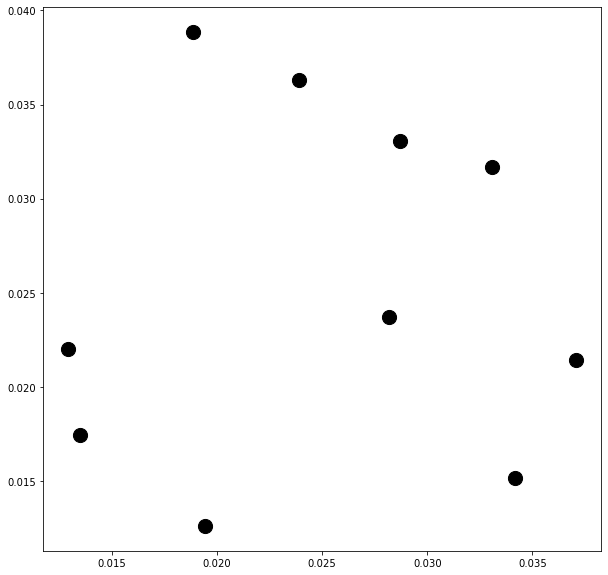

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit_predict(trained_movie_embeddings)
centroids=kmeans.cluster_centers_
# ax.scatter(trained_movie_embeddings,new_y,c=new_y,cmap='brg')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black')
plt.show()

In [21]:
trained_movie_embeddings[0],new_y[0]

(array([0.01845557, 0.04955209, 0.01310339, 0.01347044, 0.04405535,
        0.02133599, 0.00525752, 0.03483029], dtype=float32),
 7)

In [22]:
trained_movie_embeddings.shape,new_y.shape

((9066, 8), (9066,))

In [24]:
movies_df.iloc[5688]['title']

'Rio Grande'

In [25]:
movies_df["title"][movies_df['movieId']==str(11617)]

5688    Rio Grande
Name: title, dtype: object

In [26]:
for clusterpt,movieid,cluster in zip(trained_movie_embeddings,ratings_df.movieId.unique(),kmeans.labels_):
#     print(type(int(movieid)))
#     print("----------")
    if cluster == 9:
        print(f"Title: { movies_df.iloc[movieid]['title']}. Cluster: {cluster}")

Title: Romeo + Juliet. Cluster: 9
Title: Unforgotten: Twenty-Five Years After Willowbrook. Cluster: 9
Title: Don't Be a Menace to South Central While Drinking Your Juice in the Hood. Cluster: 9
Title: Blue in the Face. Cluster: 9
Title: Just Cause. Cluster: 9
Title: The Jungle Book. Cluster: 9
Title: North. Cluster: 9
Title: Barb Wire. Cluster: 9
Title: The Hunted. Cluster: 9
Title: Gold Diggers: The Secret of Bear Mountain. Cluster: 9
Title: Bad Taste. Cluster: 9
Title: Irma la Douce. Cluster: 9
Title: Monsieur Verdoux. Cluster: 9
Title: Love in the Afternoon. Cluster: 9
Title: The Adventures of Robin Hood. Cluster: 9
Title: The Associate. Cluster: 9
Title: The Day the Earth Stood Still. Cluster: 9
Title: The Man Who Would Be King. Cluster: 9
Title: Jerry Maguire. Cluster: 9
Title: Scream. Cluster: 9
Title: Star Kid. Cluster: 9
Title: A Letter from Death Row. Cluster: 9
Title: Smoke Signals. Cluster: 9
Title: Tall Tale. Cluster: 9
Title: Mr. & Mrs. Smith. Cluster: 9
Title: One Man's H

IndexError: single positional indexer is out-of-bounds

In [ ]:
 kmeans.predict()